# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import datetime
import pytemperature
# not a standard library: pip install pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# not a standard library: pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# now
now = datetime.datetime.now()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API used: https://openweathermap.org/api

# by coordinates: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# by city name: api.openweathermap.org/data/2.5/weather?q=London

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 1

# query_url = url + "appid=" + api_key + "&q=" + city #to do
generic_weather_url = url + "appid=" + api_key + "&q="
pp = pprint.PrettyPrinter(indent=4)

# functionality
print(f'\033[4m' 'Beginning Data Retrieval' '\033[0m') # status update while processing
for count, city in enumerate(cities, start=1):
#     Build query URL 
    query_url = generic_weather_url + city
#     Get weather data
    print(f'Processing Record {count} of Set 1 | {city}')
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json['cod'] != 200:
        print(f'City not found. Skipping...')
    else: #include in our dataset
#         pp.pprint(weather_json)
        humidity = float(weather_json['main']['humidity'])
        if humidity <= 100:  #humidity can not be above 100 percent
            City.append(weather_json['name'])
            Cloudiness.append(weather_json['clouds']['all'])
            Country.append(weather_json['sys']['country'])
            Date.append(weather_json['dt'])
            Humidity.append(weather_json['main']['humidity'])
            Lat.append(weather_json['coord']['lat'])
            Lng.append(weather_json['coord']['lon'])
            Max_Temp.append(pytemperature.k2f(weather_json['main']['temp_max']))
            Wind_Speed.append(weather_json['wind']['speed'])     

Beginning Data Retrieval
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | le port
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | azangaro
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | yarada
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | vanimo
Processing Record 9 of Set 1 | kununurra
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | shar
Processing Record 13 of Set 1 | olfen
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | pimenta bueno
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | mizdah
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | saldanha
Processing Record 23 of Set 1 | katherine
Processing R

City not found. Skipping...
Processing Record 187 of Set 1 | presidencia roque saenz pena
Processing Record 188 of Set 1 | fortuna
Processing Record 189 of Set 1 | cidreira
Processing Record 190 of Set 1 | porto novo
Processing Record 191 of Set 1 | rocha
Processing Record 192 of Set 1 | aksarka
Processing Record 193 of Set 1 | nikolskoye
Processing Record 194 of Set 1 | teya
Processing Record 195 of Set 1 | lorengau
Processing Record 196 of Set 1 | zharkent
Processing Record 197 of Set 1 | aanekoski
Processing Record 198 of Set 1 | buena vista
Processing Record 199 of Set 1 | stakhanov
Processing Record 200 of Set 1 | georgetown
Processing Record 201 of Set 1 | henties bay
Processing Record 202 of Set 1 | umm lajj
Processing Record 203 of Set 1 | mwene-ditu
Processing Record 204 of Set 1 | kazerun
Processing Record 205 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 206 of Set 1 | winona
Processing Record 207 of Set 1 | bubaque
Processing Record 208 of Set 1 | laguna

Processing Record 367 of Set 1 | guangyuan
Processing Record 368 of Set 1 | nebolchi
Processing Record 369 of Set 1 | manaia
Processing Record 370 of Set 1 | puerto del rosario
Processing Record 371 of Set 1 | omsukchan
Processing Record 372 of Set 1 | totma
Processing Record 373 of Set 1 | briancon
Processing Record 374 of Set 1 | rock sound
Processing Record 375 of Set 1 | ovre ardal
Processing Record 376 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 377 of Set 1 | kushmurun
City not found. Skipping...
Processing Record 378 of Set 1 | lolua
City not found. Skipping...
Processing Record 379 of Set 1 | half moon bay
Processing Record 380 of Set 1 | xai-xai
Processing Record 381 of Set 1 | contai
Processing Record 382 of Set 1 | aban
City not found. Skipping...
Processing Record 383 of Set 1 | mar del plata
Processing Record 384 of Set 1 | neiafu
Processing Record 385 of Set 1 | tenenkou
Processing Record 386 of Set 1 | tumpat
Processing Record 387 of Set 1 | tibiri


Processing Record 545 of Set 1 | riverbank
Processing Record 546 of Set 1 | ouargaye
Processing Record 547 of Set 1 | chara
Processing Record 548 of Set 1 | lagos
Processing Record 549 of Set 1 | taungdwingyi
Processing Record 550 of Set 1 | havre-saint-pierre
Processing Record 551 of Set 1 | vaitape
Processing Record 552 of Set 1 | abu samrah
Processing Record 553 of Set 1 | nouadhibou
Processing Record 554 of Set 1 | illapel
Processing Record 555 of Set 1 | bad mergentheim
Processing Record 556 of Set 1 | popondetta
Processing Record 557 of Set 1 | biharamulo
Processing Record 558 of Set 1 | melendugno
Processing Record 559 of Set 1 | cabo rojo
Processing Record 560 of Set 1 | tiznit
Processing Record 561 of Set 1 | koslan
Processing Record 562 of Set 1 | dunkirk
Processing Record 563 of Set 1 | ozark
Processing Record 564 of Set 1 | ushtobe
Processing Record 565 of Set 1 | zyryanka
Processing Record 566 of Set 1 | chubbuck
Processing Record 567 of Set 1 | beyneu
Processing Record 56

In [5]:
# build the dataframe
city_weather_dict = {
    'City':          City,
    'Cloudiness':    Cloudiness,
    'Country':       Country,
    'Date':          Date,
    'Humidity':      Humidity,
    'Lat':           Lat,
    'Lng':           Lng,
    'Max Temp':      Max_Temp,
    'Wind Speed':    Wind_Speed    
}
city_weather_data = pd.DataFrame(city_weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_data.to_csv('WeatherPy.csv',index=False)
city_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
City          536 non-null object
Cloudiness    536 non-null int64
Country       536 non-null object
Date          536 non-null int64
Humidity      536 non-null int64
Lat           536 non-null float64
Lng           536 non-null float64
Max Temp      536 non-null float64
Wind Speed    536 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 37.8+ KB


In [7]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,75,RU,1552602600,79,64.42,-173.23,21.18,9.00
1,Le Port,0,FR,1552604410,61,42.87,1.37,48.97,0.86
2,Hilo,40,US,1552604378,61,19.71,-155.08,78.78,4.60
3,Azangaro,40,PE,1552600800,41,-14.91,-70.20,60.78,1.00
4,Arraial do Cabo,20,BR,1552604418,94,-22.97,-42.02,78.55,4.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
def generic_plot(ax_x,ax_y):
#     Build a scatter plot 
    plt.scatter(city_weather_data[ax_x], city_weather_data[ax_y], marker="o",edgecolors='black')
    x_label='Latitude'
    if ax_y == 'Max Temp':
        y_label = 'Max Temperature (F)'
        plot_title = 'City Latitude vs. Max Temperature'
    elif ax_y == 'Humidity':
        y_label= 'Humidity (%)'
        plot_title = 'City Latitude vs. Humidity'
    elif ax_y == 'Cloudiness':
        y_label= 'Cloudiness (%)'
        plot_title = 'City Latitude vs. Cloudiness'
    elif ax_y == 'Wind Speed':
        y_label= 'Wind Speed (mph)'
        plot_title = 'City Latitude vs. Cloudiness'
    else:
        y_label= 'N/A'
        plot_title = 'N/A'
   
    today=now.strftime("%m/%d/%Y")
    plot_title=plot_title+ ' ('+today+')'
    # Incorporate the other graph properties
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save Figure
    fig_title = (f'{plot_title}.png')
    plt.savefig('pyber ride sharing data.png')
    
    # Show plot
    plt.show()

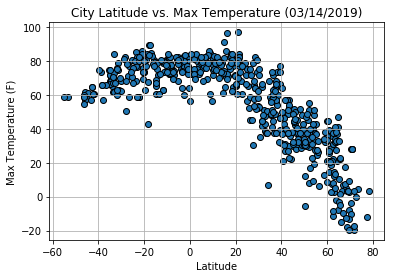

In [9]:
generic_plot('Lat','Max Temp')

#### Latitude vs. Humidity Plot

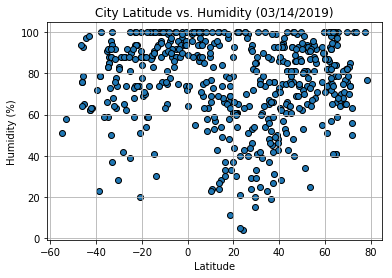

In [10]:
generic_plot('Lat','Humidity')

#### Latitude vs. Cloudiness Plot

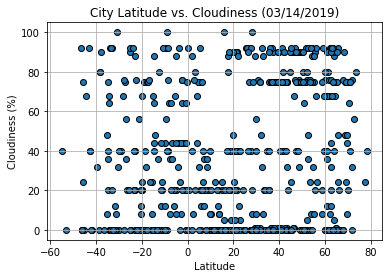

In [11]:
generic_plot('Lat','Cloudiness')

#### Latitude vs. Wind Speed Plot

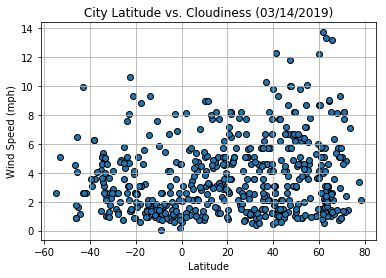

In [12]:
generic_plot('Lat','Wind Speed')